In [17]:
# use pytorch_env

import os

import numpy as np
import pandas as pd
import seaborn as sns

# import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import pickle
# from utils_bodies import feature_dist_plot, plt_obj, plot_img_subset

In [18]:
pkl_file = open('df_full.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close()

In [19]:
print(df.shape)
print(df['img_id'].unique().shape)

(7009, 32)
(816,)


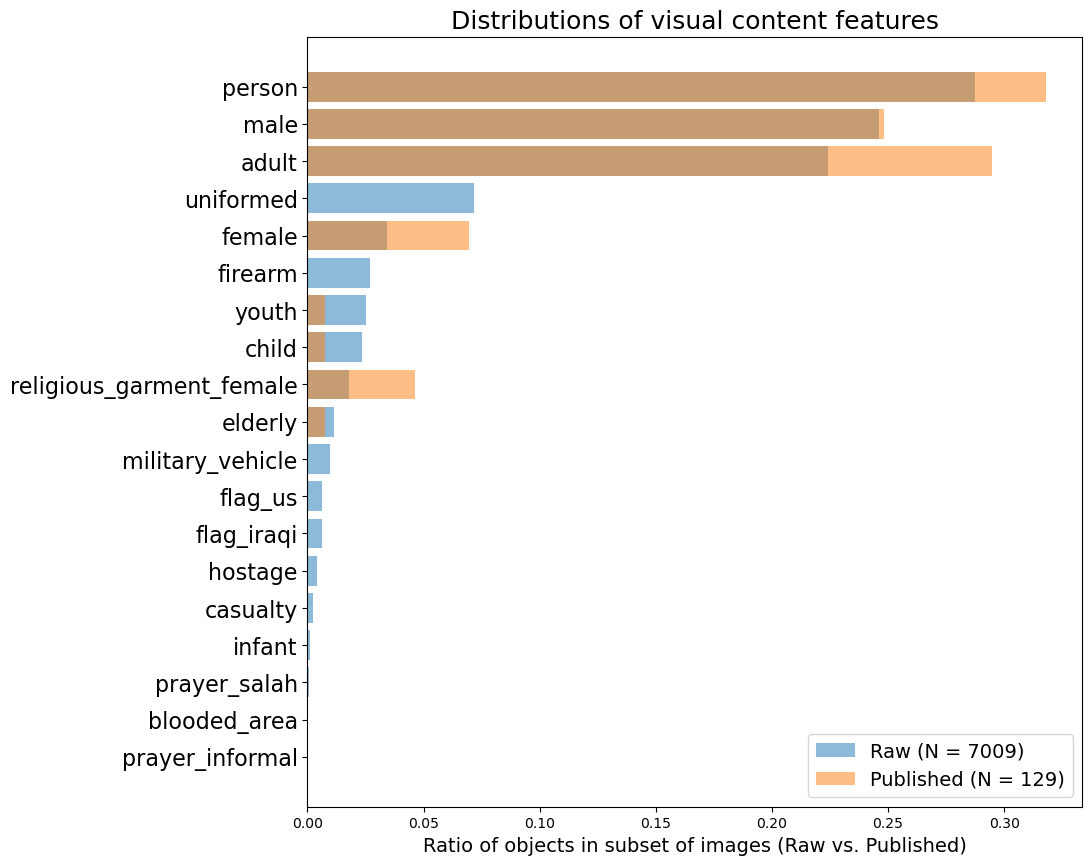

In [20]:
def feature_dist_plot2(df):

    N = df.shape[0]
    N_P = df[df['custom2'] == 'Published'].shape[0]

    features_count = df.groupby('feature').count().sort_values(['img_id'], ascending = True)[['img_id']].reset_index()
    features_count_P = df[df['custom2'] == 'Published'].groupby('feature').count().sort_values(['img_id'], ascending = True)[['img_id']].reset_index()

    features_count['ratio'] = features_count['img_id']/N
    features_count_P['ratio_P'] = features_count_P['img_id']/N_P

    features_count = features_count.merge(features_count_P, how = 'outer', on = 'feature')
    features_count.fillna(0, inplace= True)
    features_count.rename({'img_id_x' : 'count', 'img_id_y' : 'count_P'}, axis = 1, inplace= True)

    # --------------------------------------------

    plt.figure(figsize = [10,10])

    plt.title("Distributions of visual content features", fontsize = 18)

    plt.barh(np.arange(0, features_count.shape[0],1) ,features_count['ratio'], alpha = 0.5, label = f'Raw (N = {N})')
    plt.barh(np.arange(0, features_count.shape[0],1) ,features_count['ratio_P'], alpha = 0.5, label = f'Published (N = {N_P})')

    plt.yticks(np.arange(0,features_count.shape[0],1), features_count['feature'], fontsize = 16)
    plt.xlabel('Ratio of objects in subset of images (Raw vs. Published)', fontsize = 14)

    plt.legend(fontsize = 14, loc = 'lower right')

    plt.savefig(f'feature_dist_new.pdf', bbox_inches="tight")   

    plt.show()

feature_dist_plot2(df)

In [28]:
def get_count_df(df):

    N = df.shape[0]

    N_R = df[df['custom2'] == 'Raw'].shape[0]
    N_P = df[df['custom2'] == 'Published'].shape[0]

    # features_count = df.groupby('feature').count().sort_values(['img_id'], ascending = True)[['img_id']].reset_index()

    features_count_R = df[df['custom2'] == 'Raw'].groupby('feature').count().sort_values(['img_id'], ascending = True)[['img_id']].reset_index()
    features_count_P = df[df['custom2'] == 'Published'].groupby('feature').count().sort_values(['img_id'], ascending = True)[['img_id']].reset_index()

    features_count_R['ratio_R'] = features_count_R['img_id']/N_R
    features_count_P['ratio_P'] = features_count_P['img_id']/N_P

    features_count_RP = features_count_R.merge(features_count_P, how = 'outer', on = 'feature')
    features_count_RP.fillna(0, inplace= True)
    features_count_RP.rename({'img_id_x' : 'count', 'img_id_y' : 'count_P'}, axis = 1, inplace= True)

    return(features_count_RP)

count_df = get_count_df(df)

In [74]:
df2 = pd.get_dummies(df['feature'])
df2['img_id'] = df['img_id']
df2['custom2'] = df['custom2']
df2 = df2.groupby(['img_id','custom2']).sum().reset_index()
df2

,img_id,custom2,adult,blooded_area,casualty,child,elderly,female,firearm,flag_iraqi,...,hostage,infant,male,military_vehicle,person,prayer_informal,prayer_salah,religious_garment_female,uniformed,youth
0,JS10088,Raw,5,0,0,0,0,0,2,0,...,0,0,5,0,5,0,0,0,4,0
1,JS10096,Raw,5,0,0,0,0,0,0,0,...,0,0,7,0,7,0,0,0,1,2
2,JS10098,Raw,1,0,0,1,0,2,0,0,...,0,0,0,0,2,0,0,1,0,0
3,JS10119,Raw,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,JS1037,Raw,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,JS9916,Raw,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
812,JS9933,Raw,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
813,JS9954,Raw,4,0,0,0,0,0,6,0,...,0,0,3,0,4,0,0,0,4,0
814,JS9969,Raw,3,0,0,0,0,0,4,0,...,0,0,3,0,3,0,0,0,3,0


In [80]:
print(df2[df2['custom2'] == 'Published'].shape[0])
print(df2[df2['custom2'] == 'Raw'].shape[0])


13
803


In [81]:
import pymc3 as pm

In [122]:
count_df[count_df['feature'] == 'religious_garment_female']['ratio_R'].item()

0.017151162790697675

In [143]:
# rg_female_a = df2[df2['custom2'] == 'Raw']['religious_garment_female']
rg_female_a = count_df[count_df['feature'] == 'religious_garment_female']['ratio_R'].item()

#group A
with pm.Model() as model_A:
    #set the prior distribution of $p_A$.
    # p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_A = pm.Beta('p_A', 2, 2)

    
    #fit the observed data to our model 
    obs = pm.Binomial("obs", n=803, p=p_A, observed=rg_female_a)    
                    
    #MCMC algorithm 
    # step=pm.Metropolis()
    step = pm.NUTS()    
    
    #sampling from the posterior distriubtion. 
    trace_A = pm.sample(10000, step=step)
    burned_trace_A = trace_A[1000:]

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:14<00:00, 2947.25draws/s]
The acceptance probability does not match the target. It is 0.8788734705852178, but should be close to 0.8. Try to increase the number of tuning steps.


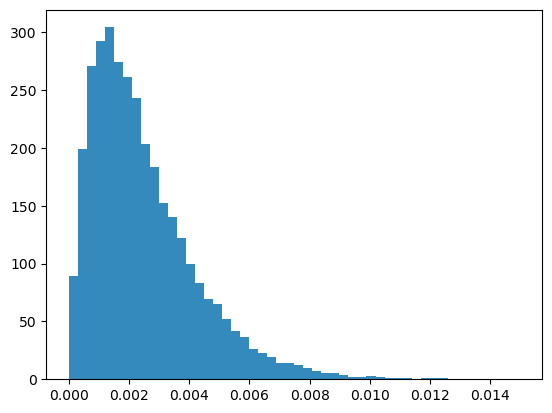

In [144]:
plt.hist(burned_trace_A["p_A"], bins=50, histtype='stepfilled', density=True, color='#348ABD')
plt.show()

In [145]:
# rg_female_b = df2[df2['custom2'] == 'Published']['religious_garment_female']
rg_female_b = count_df[count_df['feature'] == 'religious_garment_female']['ratio_P'].item()


#group A
with pm.Model() as model_B:
    #set the prior distribution of $p_A$.
    # p_B = pm.Uniform('p_B', lower=0, upper=1)
    p_B = pm.Beta('p_B', 2, 2)
  
    
    #fit the observed data to our model 
    obs = pm.Binomial("obs", n=13, p=p_B, observed=rg_female_b)    
                    
    #MCMC algorithm 
    # step=pm.Metropolis()
    step = pm.NUTS()    
    
    #sampling from the posterior distriubtion. 
    trace_B = pm.sample(10000, step=step)
    burned_trace_B = trace_B[1000:]

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_B]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:13<00:00, 3006.49draws/s]


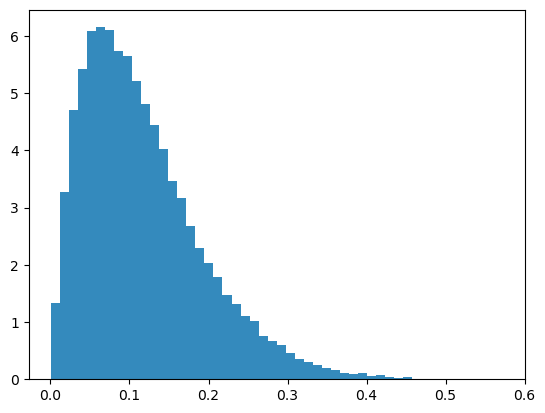

In [146]:
plt.hist(burned_trace_B["p_B"], bins=50, histtype='stepfilled', density=True, color='#348ABD')
plt.show()

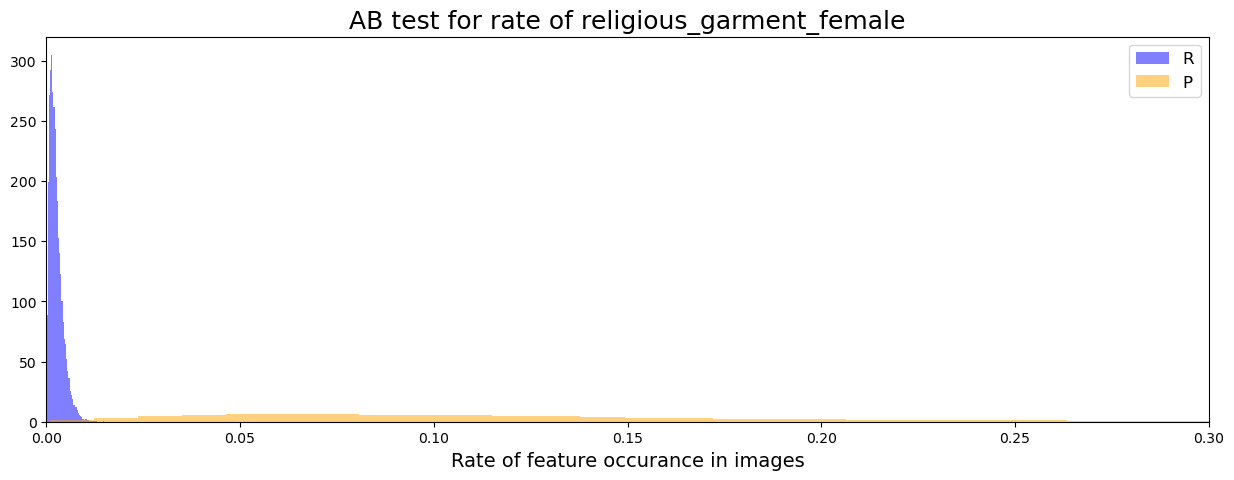

In [159]:
plt.figure(figsize = [15,5])

plt.hist(burned_trace_A["p_A"], bins=50, histtype='stepfilled', density=True, color='blue', alpha = 0.5, label= 'R')
plt.hist(burned_trace_B["p_B"], bins=50, histtype='stepfilled', density=True, color='orange', alpha = 0.5, label= 'P')

plt.ylim(0,320)
plt.xlim(0,0.3)

plt.title("AB test for rate of religious_garment_female", fontsize = 18)
plt.xlabel('Rate of feature occurance in images', fontsize = 14)

plt.legend(fontsize = 12)

plt.savefig(f'AB_test_rgf.pdf', bbox_inches="tight")   

plt.show()

In [156]:
(burned_trace_A["p_A"] < burned_trace_B["p_B"]).sum() / burned_trace_B["p_B"].shape[0]

0.9987777777777778